Import

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

Data

In [216]:
data = pd.read_csv('shot_logs.csv')
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [217]:
data.shape


(128069, 21)

In [218]:
data.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [219]:
data.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

**Opis stupaca**

- GAME_ID - identifikator utakmice
- MATCHUP - timovi koji su igrali utakmicu i datum
- LOCATION - domaća ili gostujuća utakmica (Home (H) ili Away (A))
- W - ishod utakmice (pobjeda - W / poraz - L)
- FINAL_MARGIN - konačna razlika u poenima 
- SHOT_NUMBER - redni broj šuta za igrača u toj utakmici
- PERIOD - četvrtina ili produžetak utakmice (1-4 za četvrtine, 5-7 za produžetke)
- GAME_CLOCK - preostalo vrijeme u četvrtini u minutama i sekundama
- SHOT_CLOCK - preostalo vrijeme na štoperskom satu u sekundama
- DRIBBLES - broj driblinga prije šuta
- TOUCH_TIME - trajanje vremena u kojem je igrač držao loptu prije šuta
- SHOT_DIST - udaljenost od koša u stopama
- PTS_TYPE - vrsta šuta (za 2 poena ili 3 poena)
- SHOT_RESULT - ishod šuta (pogodak/promašaj), ciljana varijabla
- CLOSEST_DEFENDER - ime najbližeg obrambenog igrača
- CLOSEST_DEFENDER_PLAYER_ID - ID najbližeg obrambenog igrača
- CLOSE_DEF_DIST - udaljenost do najbližeg obrambenog igrača u stopama
- FGM - postignut koš (1 za da, 0 za ne)
- PTS - poeni zarađeni tim šutom (0, 2 ili 3)
- player_name - ime igrača koji šutira
- player_id - ID igrača koji šutira

In [220]:
data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


**Suvišne varijable**

Možemo primjetiti kako nam podaci u stupcima kao što su **SHOT_RESULT**, **FGM** i **PTS** zapravo ukazuju na istu stvar, a to je da li je postignut koš. Stoga sam ja odlučila ukloniti varijable **FGM** i **PTS** budući da je **SHOT_RESULT** ciljana varijabla.
Također, podaci o datumu utakmice i timovima kao i igraču koji je postigao koš i najbližem obrambenom igraču nisu toliko bitna, pa sam odlučila ukloniti takve podatke. 

In [221]:
data.drop(['FGM', 'PTS', 'player_name', 'CLOSEST_DEFENDER', 'MATCHUP'], axis=1, inplace=True)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   LOCATION                    128069 non-null  object 
 2   W                           128069 non-null  object 
 3   FINAL_MARGIN                128069 non-null  int64  
 4   SHOT_NUMBER                 128069 non-null  int64  
 5   PERIOD                      128069 non-null  int64  
 6   GAME_CLOCK                  128069 non-null  object 
 7   SHOT_CLOCK                  122502 non-null  float64
 8   DRIBBLES                    128069 non-null  int64  
 9   TOUCH_TIME                  128069 non-null  float64
 10  SHOT_DIST                   128069 non-null  float64
 11  PTS_TYPE                    128069 non-null  int64  
 12  SHOT_RESULT                 128069 non-null  object 
 13  CLOSEST_DEFEND

**Nedostajući podaci**

In [223]:
data.isna().sum()

GAME_ID                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
player_id                        0
dtype: int64

In [224]:
postotak_nedostajucih = data.isna().mean() * 100
print('Postotak nedostajućih vrijednosti:')
print(postotak_nedostajucih['SHOT_CLOCK'])

Postotak nedostajućih vrijednosti:
4.3468755124190865


Vidimo da nedostajuće vrijednosti ima samo stupac **SHOT_CLOCK**. Budući da je postotak ispod 5% odlučila sam zamijeniti podatke sa srednjom vrijednošću.

In [225]:
data.loc[data['SHOT_CLOCK'].isna(), 'SHOT_CLOCK'] = data['SHOT_CLOCK'].mean()
data['SHOT_CLOCK'].isna().sum()

np.int64(0)

In [226]:
data.isna().sum()

GAME_ID                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
player_id                     0
dtype: int64

In [227]:
data.shape


(128069, 16)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   LOCATION                    128069 non-null  object 
 2   W                           128069 non-null  object 
 3   FINAL_MARGIN                128069 non-null  int64  
 4   SHOT_NUMBER                 128069 non-null  int64  
 5   PERIOD                      128069 non-null  int64  
 6   GAME_CLOCK                  128069 non-null  object 
 7   SHOT_CLOCK                  128069 non-null  float64
 8   DRIBBLES                    128069 non-null  int64  
 9   TOUCH_TIME                  128069 non-null  float64
 10  SHOT_DIST                   128069 non-null  float64
 11  PTS_TYPE                    128069 non-null  int64  
 12  SHOT_RESULT                 128069 non-null  object 
 13  CLOSEST_DEFEND

**Kategoričke u numeričke podatke**

Možemo primjetiti kao kategoričke varijable većinom možemo zamijeniti s 0 ili 1, osim **GAME_CLOCK** koju ćemo preračunati u sekunde.

In [229]:
le = LabelEncoder()

data['LOCATION'] = le.fit_transform(data['LOCATION'])
data['W'] = le.fit_transform(data['W'])
data['SHOT_RESULT'] = le.fit_transform(data['SHOT_RESULT'])

In [230]:
data.head()

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
0,21400899,0,1,24,1,1,1:09,10.800000,2,1.9,7.7,2,0,101187,1.3,203148
1,21400899,0,1,24,2,1,0:14,3.400000,0,0.8,28.2,3,1,202711,6.1,203148
2,21400899,0,1,24,3,1,0:00,12.453344,3,2.7,10.1,2,1,202711,0.9,203148
3,21400899,0,1,24,4,2,11:47,10.300000,2,1.9,17.2,2,1,203900,3.4,203148
4,21400899,0,1,24,5,2,10:34,10.900000,2,2.7,3.7,2,1,201152,1.1,203148


- **LOCATION**: 1 - domaćin, 0 - gost
- **W**: 1 - pobjeda, 0 - poraz
- **SHOT_RESULT**: 1 - postignut koš, 0 - promašen

In [231]:
data['GAME_CLOCK_SEC'] = data['GAME_CLOCK'].apply(lambda time: int(time.split(':')[0]) * 60 + int(time.split(':')[1]))

**Stršeće vrijednosti**

In [232]:
data.describe()

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,GAME_CLOCK_SEC
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.499215,0.504377,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,0.547861,159038.487284,4.123015,157238.251247,351.393811
std,2.578773e+02,0.500001,0.499983,13.233267,4.713260,1.139919,5.636611,3.477760,3.043682,8.888964,0.441159,0.497706,78791.172947,2.756446,79362.389336,207.590603
min,2.140000e+07,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,708.000000,0.000000,708.000000,0.000000
25%,2.140023e+07,0.000000,0.000000,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,101162.000000,172.000000
50%,2.140045e+07,0.000000,1.000000,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,1.000000,201949.000000,3.700000,201939.000000,352.000000
75%,2.140067e+07,1.000000,1.000000,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,202704.000000,531.000000
max,2.140091e+07,1.000000,1.000000,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,204060.000000,720.000000


Dodatno ćemo pogledati **FINAL_MARGIN** i **TOUCH_TIME** budući da vidimo nekonzistentnost u podacima.

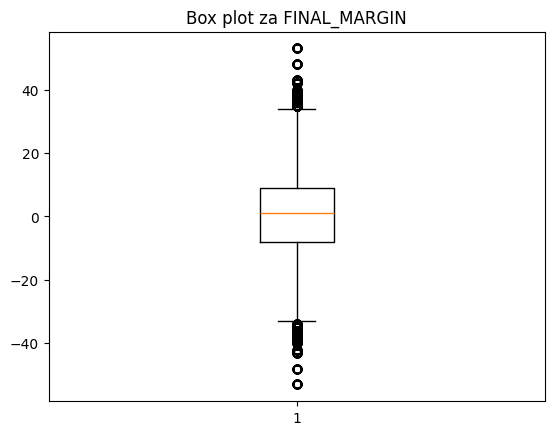

In [233]:
plt.boxplot(data['FINAL_MARGIN'])
plt.title('Box plot za FINAL_MARGIN')
plt.show()

In [234]:
data = data[data['FINAL_MARGIN'] > -33]
data = data[data['FINAL_MARGIN'] < 35]

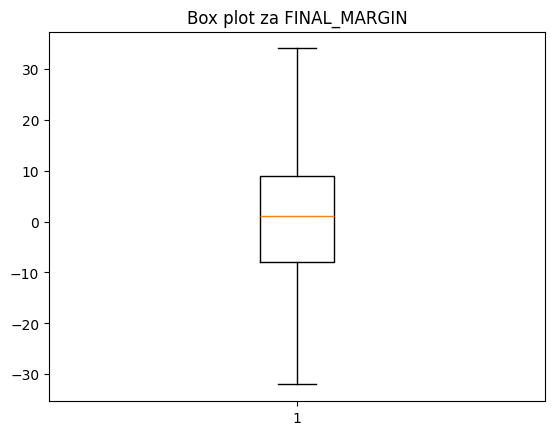

In [235]:
plt.boxplot(data['FINAL_MARGIN'])
plt.title('Box plot za FINAL_MARGIN')
plt.show()

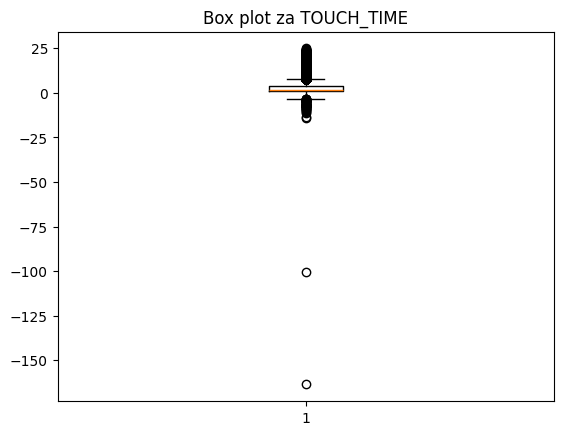

In [236]:
plt.boxplot(data['TOUCH_TIME'])
plt.title('Box plot za TOUCH_TIME')
plt.show()

In [237]:
data = data[data['TOUCH_TIME'] > 0]
data = data[data['TOUCH_TIME'] <= 24]

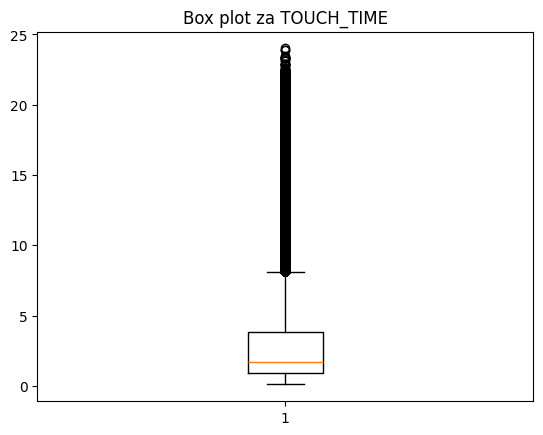

In [238]:
plt.boxplot(data['TOUCH_TIME'])
plt.title('Box plot za TOUCH_TIME')
plt.show()

**Vizualizacija podataka**

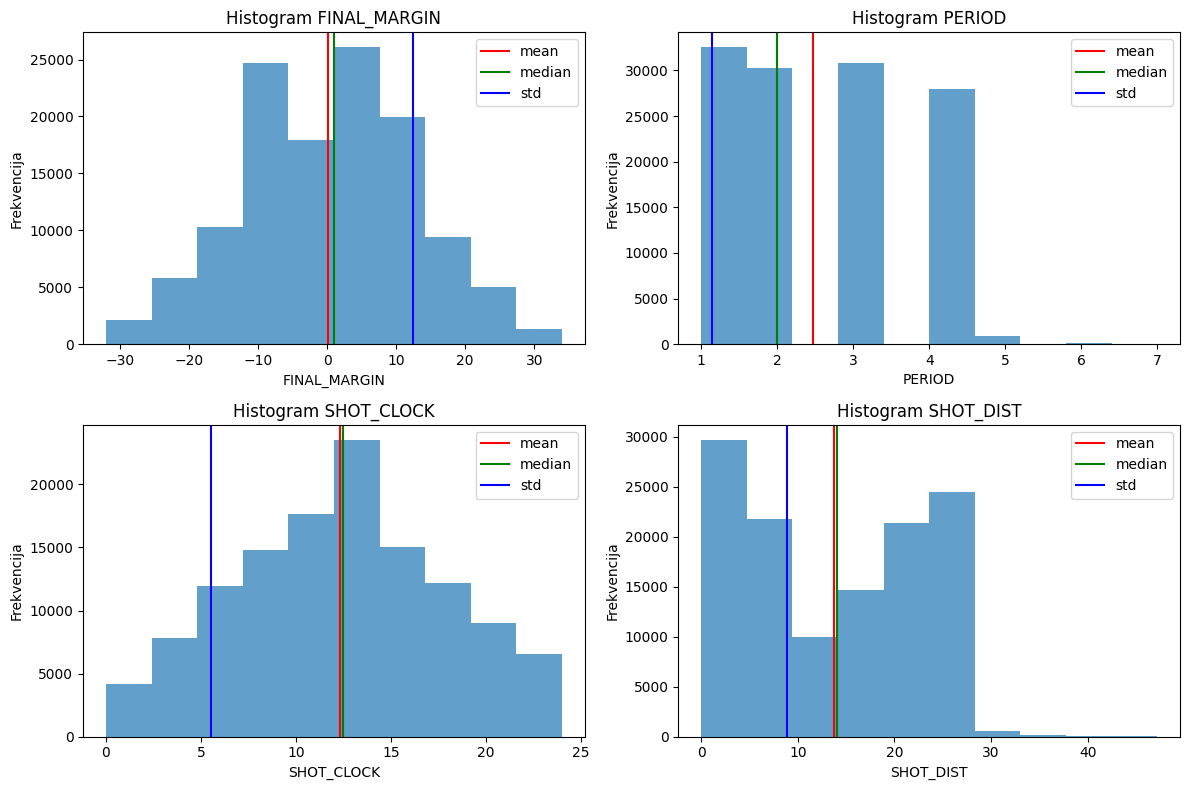

In [239]:
import matplotlib.pyplot as plt

col1 = 'FINAL_MARGIN'
col2 = 'PERIOD'
col3 = 'SHOT_CLOCK'
col4 = 'SHOT_DIST'

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
axes = axes.ravel() 

axes[0].hist(data[col1], bins=10, alpha=0.7)
axes[0].axvline(data[col1].mean(), color='red', label="mean")
axes[0].axvline(data[col1].median(), color='green', label="median")
axes[0].axvline(data[col1].std(), color='blue', label="std")
axes[0].set_title(f'Histogram {col1}')
axes[0].set_xlabel(col1)
axes[0].set_ylabel('Frekvencija')
axes[0].legend()

axes[1].hist(data[col2], bins=10, alpha=0.7)
axes[1].axvline(data[col2].mean(), color='red', label="mean")
axes[1].axvline(data[col2].median(), color='green', label="median")
axes[1].axvline(data[col2].std(), color='blue', label="std")
axes[1].set_title(f'Histogram {col2}')
axes[1].set_xlabel(col2)
axes[1].set_ylabel('Frekvencija')
axes[1].legend()

axes[2].hist(data[col3], bins=10, alpha=0.7)
axes[2].axvline(data[col3].mean(), color='red', label="mean")
axes[2].axvline(data[col3].median(), color='green', label="median")
axes[2].axvline(data[col3].std(), color='blue', label="std")
axes[2].set_title(f'Histogram {col3}')
axes[2].set_xlabel(col3)
axes[2].set_ylabel('Frekvencija')
axes[2].legend()

axes[3].hist(data[col4], bins=10, alpha=0.7)
axes[3].axvline(data[col4].mean(), color='red', label="mean")
axes[3].axvline(data[col4].median(), color='green', label="median")
axes[3].axvline(data[col4].std(), color='blue', label="std")
axes[3].set_title(f'Histogram {col4}')
axes[3].set_xlabel(col4)
axes[3].set_ylabel('Frekvencija')
axes[3].legend()

plt.tight_layout()
plt.show()


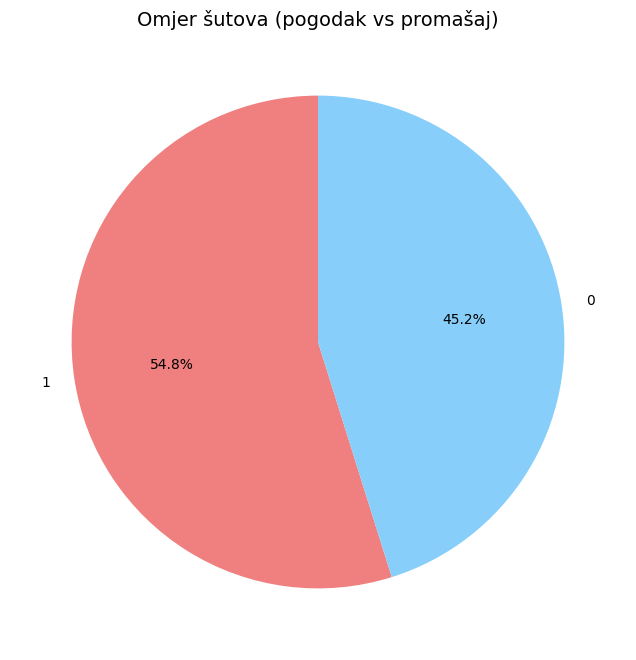

In [240]:
shot_results = data['SHOT_RESULT'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(shot_results, labels=shot_results.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Omjer šutova (pogodak vs promašaj)', fontsize=14)
plt.show()

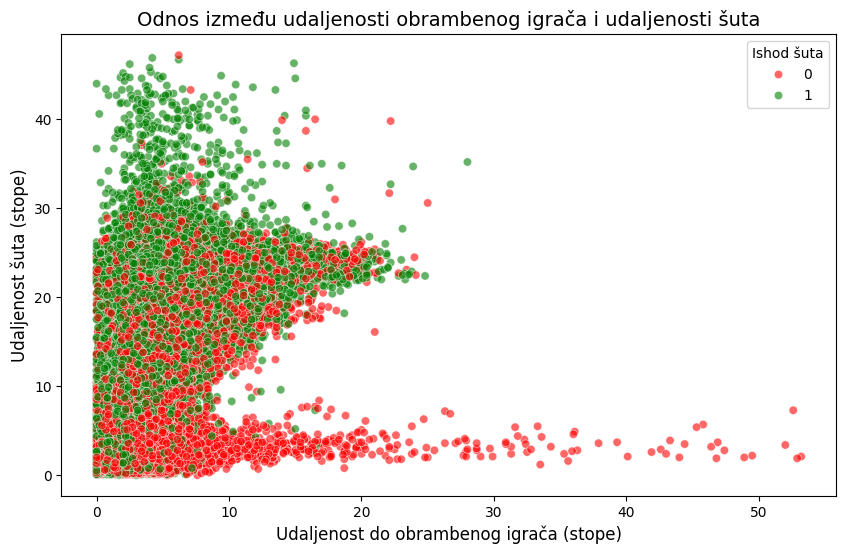

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLOSE_DEF_DIST', y='SHOT_DIST', hue='SHOT_RESULT', data=data, alpha=0.6, palette={1: 'green', 0: 'red'})
plt.title('Odnos između udaljenosti obrambenog igrača i udaljenosti šuta', fontsize=14)
plt.xlabel('Udaljenost do obrambenog igrača (stope)', fontsize=12)
plt.ylabel('Udaljenost šuta (stope)', fontsize=12)
plt.legend(title='Ishod šuta')
plt.show()

- Utjecaj udaljenosti obrambenog igrača na ishod šuta:

Kada je udaljenost obrambenog igrača (CLOSE_DEF_DIST) veća (npr. preko 15 stopa), zelenih točaka (pogodaka) je više nego crvenih (promašaja). Ovo sugerira da šut ima veće šanse za uspjeh kada je obrambeni igrač dalje od šutera.
Kada je obrambeni igrač bliže (npr. unutar 5 stopa), čini se da ima više crvenih točaka (promašaja), što znači da je šut otežan.
- Odnos između udaljenosti šuta i ishoda:

Šutevi sa manjih udaljenosti (SHOT_DIST) imaju više pogodaka (zelene točke) nego promašaja, što ukazuje na veću preciznost iz blizine.
Kako se udaljenost šuta povećava (preko 25-30 stopa), većina šuteva su promašaji (crvene točke), što znači da preciznost opada s udaljenošću.
- Zasićenje podataka:

Većina podataka je koncentrirana između 0-20 stopa za udaljenost šuta i 0-10 stopa za udaljenost obrambenog igrača. Ovo ukazuje na to da su ovi scenariji najčešći u utakmicama.

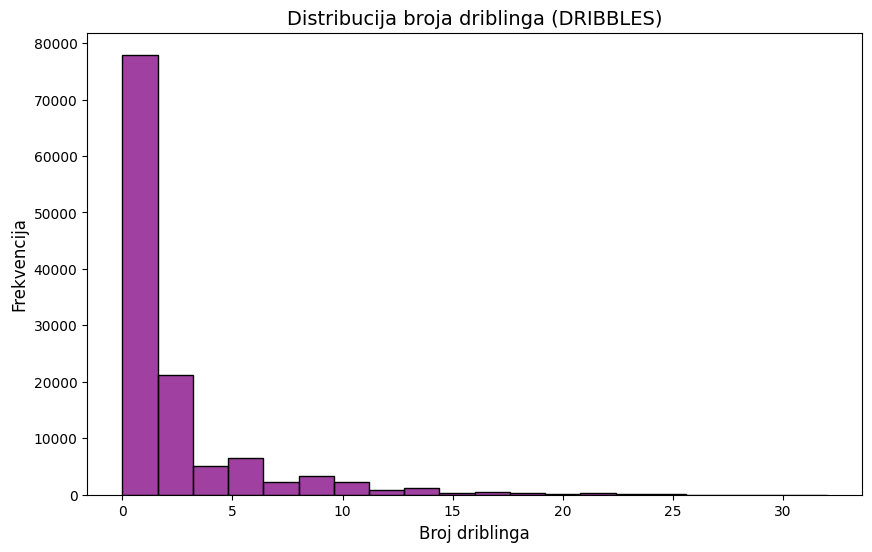

In [242]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DRIBBLES'], kde=False, bins=20, color='purple')
plt.title('Distribucija broja driblinga (DRIBBLES)', fontsize=14)
plt.xlabel('Broj driblinga', fontsize=12)
plt.ylabel('Frekvencija', fontsize=12)
plt.show()

C:\Users\karme\AppData\Local\Temp\ipykernel_30376\882836168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PTS_TYPE', y='SHOT_DIST', data=data, palette='Set2')


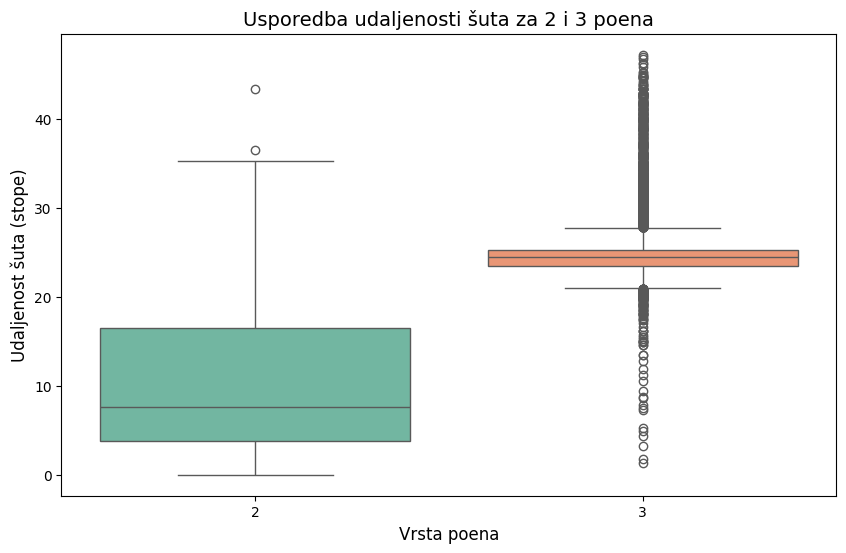

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PTS_TYPE', y='SHOT_DIST', data=data, palette='Set2')
plt.title('Usporedba udaljenosti šuta za 2 i 3 poena', fontsize=14)
plt.xlabel('Vrsta poena', fontsize=12)
plt.ylabel('Udaljenost šuta (stope)', fontsize=12)
plt.show()

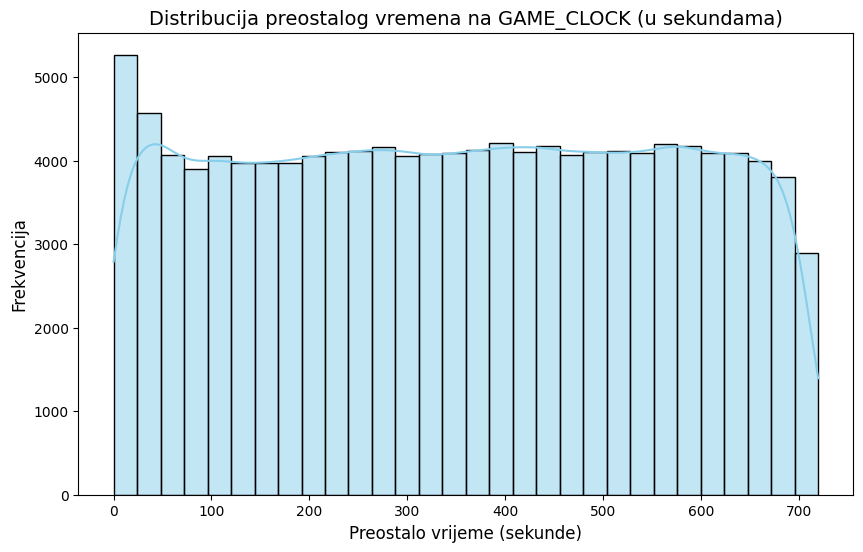

In [244]:
plt.figure(figsize=(10, 6))
sns.histplot(data['GAME_CLOCK_SEC'], kde=True, bins=30, color='skyblue')
plt.title('Distribucija preostalog vremena na GAME_CLOCK (u sekundama)', fontsize=14)
plt.xlabel('Preostalo vrijeme (sekunde)', fontsize=12)
plt.ylabel('Frekvencija', fontsize=12)
plt.show()

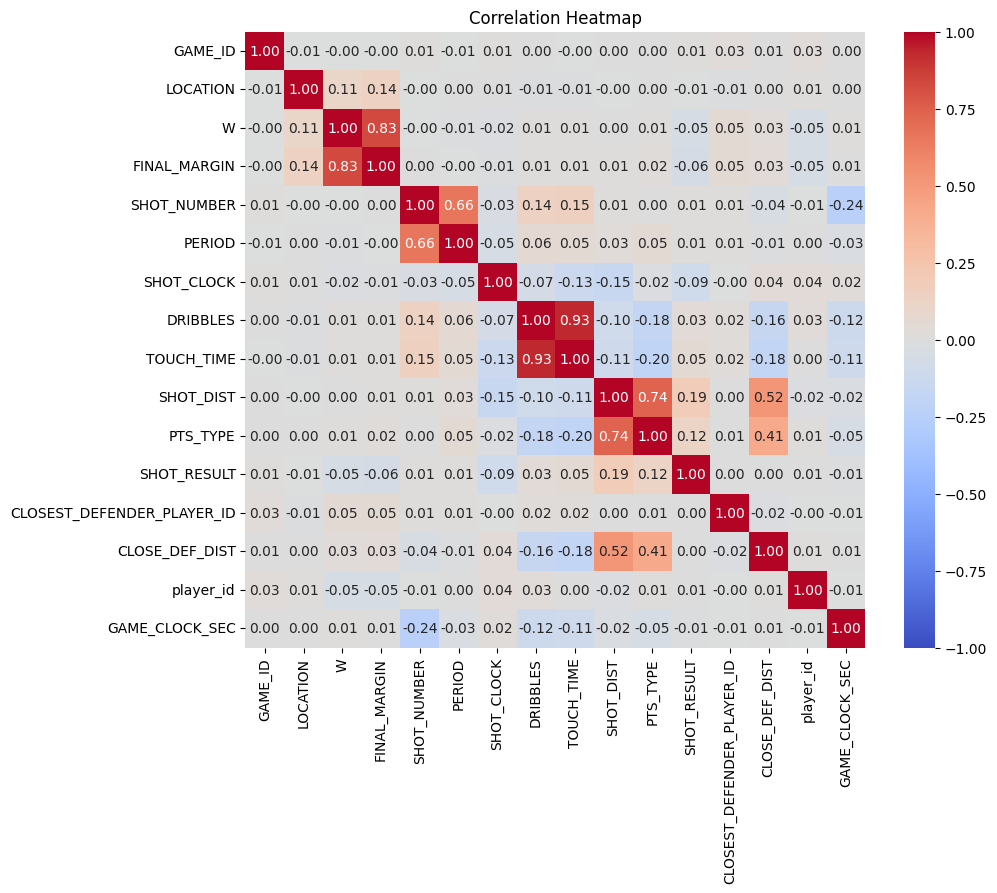

In [245]:
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()

# Vizualizacija korelacijske matrice
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Iz toplinske karte možemo primijetiti da naš skup podataka nema mnogo izrazito povezanih značajki, ali ipak postoje određene povezanosti. Na primjer, postoji jaka korelacija između DRIBBLES i TOUCH_TIME. Također, značajna je veza između SHOT_DISTANCE_METERS i PTS_TYPE.